# Problem Statement

Here I am going to apply Principal component analysis on the given dataset using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).Features with little variance in the data are then projected into new lower dimension. Then the models are trained on transformed dataset to apply machine learning models.Then I have applied Random forest Regressor on old and the transformed datasets and compared them. If you want to know the basic concept behind Principal Component Analysis check this out.

#  Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading dataset

In [3]:
data_df = pd.read_csv('data.csv')

In [4]:
data_df.shape

(62184, 11)

In [5]:
data_df.head(3)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17


In [6]:
data_df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [7]:
data_df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


df.corr() is used to find the pair-wise correlation of all the columns in a dataframe. Any NA values are automatically excluded. Also, any non-numeric column is ignored in the daraframe.

Text(0.5, 1.0, 'Correlation between various features')

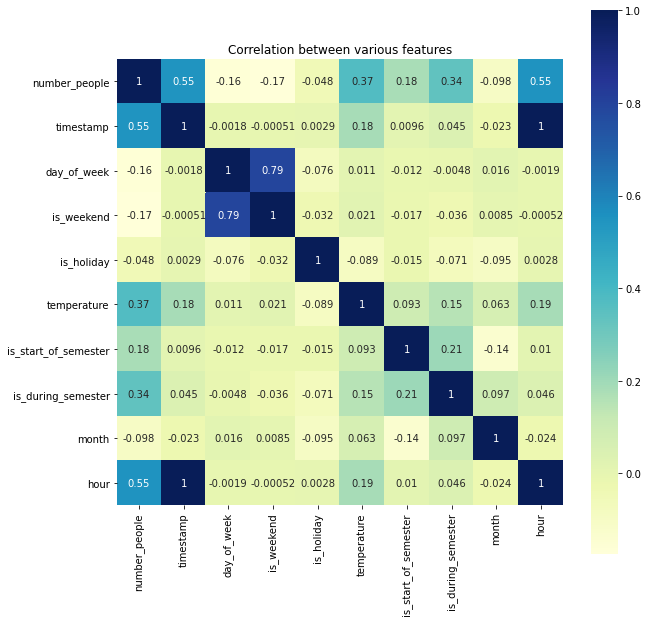

In [19]:
#  draw a heatmap for this correlation using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(), vmax = 1 , square = True , cmap = 'YlGnBu' , annot=True)
plt.title('Correlation between various features')

Text(0, 0.5, 'Month of year')

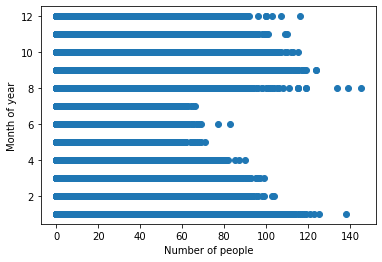

In [23]:
x = data_df['number_people']
y = data_df['month']
plt.scatter(x,y)
plt.xlabel('Number of people')
plt.ylabel('Month of year')

The above scatter plot here represents the relation between Number of People and the Month of the year. As we can observe, there is a gradual decline in Number of people attending the gym as the year progresses till 7th month. And there is a surge in the 8th month, probably due to the start of the semester.

In Dataframe, temperature is represented in Fahrenheit. now we are converting it into Celsius using formula: Celsius = (Fahrenheit - 32) * (5/9)

In [31]:
Farenheit = data_df['temperature']
F = Farenheit.tolist()
C = map(lambda x: (float(5)/9) * (x-32),F)
Celsius = (list(C))
temerature_celsius = pd.Series(Celsius)
data_df['temperature'] = temerature_celsius
data_df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,-5.506173,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,-5.506173,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,-5.506173,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,-5.506173,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,-5.506173,0,0,8,17


In [32]:
data_df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


<AxesSubplot:>

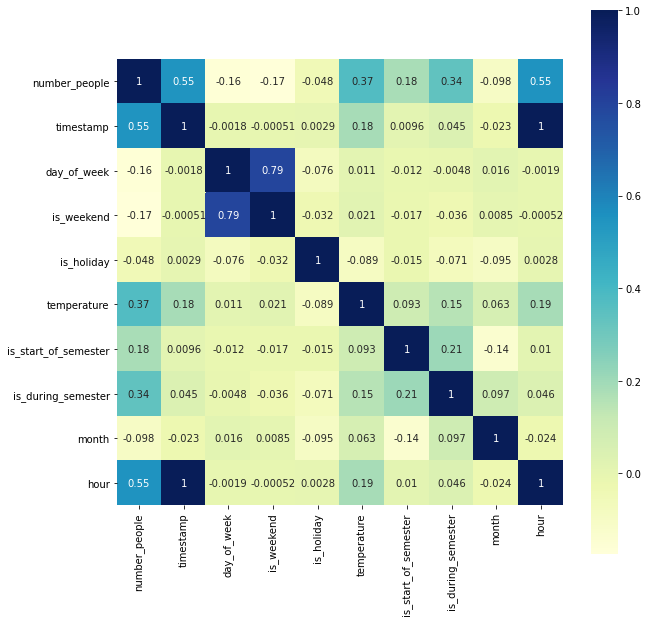

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr() , square=True , annot = True , cmap = 'YlGnBu' , vmax = 1)

In [40]:
data_df.head(3)

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,-5.506173,0,0,8,17
1,45,62414,4,0,0,-5.506173,0,0,8,17
2,40,63015,4,0,0,-5.506173,0,0,8,17


# Standardizing the data

In [42]:
x = data_df.iloc[: , 1:8]

In [43]:
y = data_df.iloc[: , 0]

In [47]:
scaler = StandardScaler()
scaler.fit(data_df)
scaled_data = scaler.fit_transform(data_df)

In [54]:
pca = PCA()

pca.fit_transform(scaled_data)


array([[ 1.20195319e+00, -3.06416416e-01,  5.35344932e-01, ...,
        -9.66722192e-02,  8.79230620e-01, -5.25822926e-02],
       [ 1.40879616e+00, -2.91121290e-01,  4.86895867e-01, ...,
         1.77995218e-01,  8.74374573e-01, -1.67498912e-02],
       [ 1.31021228e+00, -3.09134659e-01,  5.33892577e-01, ...,
        -6.58041450e-03,  8.77598799e-01,  3.36898659e-04],
       ...,
       [ 7.68602610e-01, -2.00906518e+00,  4.10703142e-01, ...,
        -7.36653370e-01, -4.28275756e-01, -4.77396837e-02],
       [ 6.25267290e-01, -2.03281916e+00,  4.73602303e-01, ...,
        -9.92822723e-01, -4.23794620e-01, -3.06588618e-02],
       [ 7.51189275e-01, -2.02233566e+00,  4.41494503e-01, ...,
        -8.19744622e-01, -4.26850329e-01, -1.25791662e-02]])

In [55]:
pca.get_covariance()

array([[ 1.00001608e+00,  5.50227219e-01, -1.62064466e-01,
        -1.73960610e-01, -4.82501246e-02,  3.73333302e-01,
         1.82685836e-01,  3.35355754e-01, -9.78551214e-02,
         5.52058322e-01],
       [ 5.50227219e-01,  1.00001608e+00, -1.79321968e-03,
        -5.08815704e-04,  2.85078360e-03,  1.84852463e-01,
         9.55105884e-03,  4.46766172e-02, -2.32214497e-02,
         9.99093506e-01],
       [-1.62064466e-01, -1.79321968e-03,  1.00001608e+00,
         7.91350923e-01, -7.58632581e-02,  1.11689106e-02,
        -1.17822146e-02, -4.82370614e-03,  1.55589363e-02,
        -1.91430511e-03],
       [-1.73960610e-01, -5.08815704e-04,  7.91350923e-01,
         1.00001608e+00, -3.18993471e-02,  2.06736733e-02,
        -1.66460432e-02, -3.61277725e-02,  8.46248251e-03,
        -5.17297084e-04],
       [-4.82501246e-02,  2.85078360e-03, -7.58632581e-02,
        -3.18993471e-02,  1.00001608e+00, -8.85280154e-02,
        -1.48581472e-02, -7.07995743e-02, -9.49438154e-02,
         2.